In [48]:
# Import required libraries
import pandas as pd
from sklearn.feature_extraction.text import HashingVectorizer
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Activation

In [49]:
# Load the dataset
df = pd.read_csv('../dataset/set_01_new.csv', encoding='utf-8').dropna()
df.columns = ['label', 'data']

X = df['data']
y = df['label']

In [50]:
# Split the dataset into training and validating sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)

# Feature extration
vectorizer = HashingVectorizer(stop_words='english', n_features=5000)
X_train = vectorizer.fit_transform(X_train).toarray()
X_test = vectorizer.transform(X_test).toarray()

In [51]:
# Build the Neural Network model
model = Sequential()
model.add(Dense(units=64, activation='relu', input_dim=X_train.shape[1]))
model.add(Dense(units=1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/20
147/147 [==============================] - 2s 7ms/step - loss: 0.4122 - accuracy: 0.9039 - val_loss: 0.1922 - val_accuracy: 0.9643
Epoch 2/20
147/147 [==============================] - 1s 5ms/step - loss: 0.1131 - accuracy: 0.9828 - val_loss: 0.0902 - val_accuracy: 0.9779
Epoch 3/20
147/147 [==============================] - 1s 7ms/step - loss: 0.0567 - accuracy: 0.9889 - val_loss: 0.0666 - val_accuracy: 0.9847
Epoch 4/20
147/147 [==============================] - 1s 8ms/step - loss: 0.0378 - accuracy: 0.9923 - val_loss: 0.0579 - val_accuracy: 0.9855
Epoch 5/20
147/147 [==============================] - 1s 5ms/step - loss: 0.0276 - accuracy: 0.9943 - val_loss: 0.0535 - val_accuracy: 0.9847
Epoch 6/20
147/147 [==============================] - 1s 6ms/step - loss: 0.0211 - accuracy: 0.9953 - val_loss: 0.0517 - val_accuracy: 0.9847
Epoch 7/20
147/147 [==============================] - 1s 7ms/step - loss: 0.0165 - accuracy: 0.9968 - val_loss: 0.0505 - val_accuracy: 0.9847
Epoch 

In [32]:
import matplotlib.pyplot as plt

# Helper function for plot graph
def plot_graphs(history, metric):
  plt.plot(history.history[metric])
  plt.plot(history.history['val_'+metric], '')
  plt.xlabel("Epochs")
  plt.ylabel(metric)
  plt.legend([metric, 'val_'+metric])
  plt.figure()

37/37 [==============================] - 0s 2ms/step - loss: 0.0582 - accuracy: 0.9838
Test accuracy: 0.9838435649871826


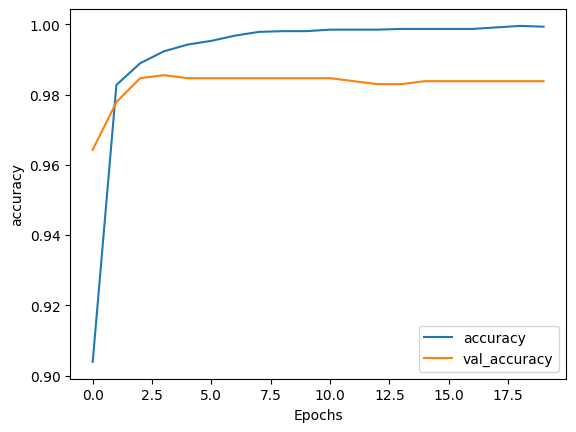

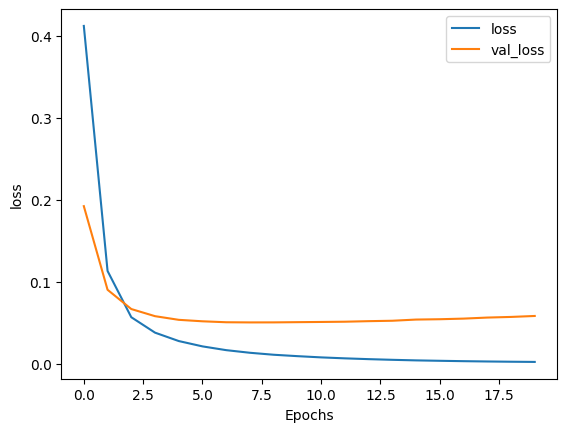

<Figure size 640x480 with 0 Axes>

In [52]:
# Evaluate the model on the testing set
loss, accuracy = model.evaluate(X_test, y_test)
print('Test accuracy:', accuracy)

plot_graphs(history, 'accuracy')
plot_graphs(history, 'loss')

In [53]:
# Test the performance of the model
def spamDetection(message):
    vectorizer = HashingVectorizer(stop_words='english', n_features=5000)
    inputMsg = vectorizer.fit_transform([message]).toarray()
    return model.predict(inputMsg)

print(spamDetection("hey let grab lunch tgt next week shall we"))
print(spamDetection("important email account has been hacked attention require click link to reset password"))

1/1 [==============================] - 0s 152ms/step
[[3.445649e-05]]
1/1 [==============================] - 0s 26ms/step
[[0.07315801]]
